In [3]:
import random
import time
# initialisation d’un tableau de taille 10 avec des valeurs aléatoires
# pour vérifier la validité des algos de tris
tab_test=[random.randint(0,20)for i in range(10)]
print(tab_test)

def est_trié(tab_test): 
#renvoie vrai si le tableau est trié
    for i in range(0,len(tab_test)):
        if tab_test[i] <= tab_test[i+1]:
            return True
        else:
            return False




[10, 20, 13, 1, 9, 15, 0, 7, 12, 14]


In [4]:
def recherche_pos(tab_test,elem,fin):
    for j in range(0,fin): 
    #cherche la position à laquelle on attribuera la valeur de tab[i], donc elem
        if elem < tab_test[j]:
            return j
    return fin  


def triinsertion(tab_test):
    for i in range(1,len(tab_test)): 
    #processe chaque éléments du tableau
        elem = tab_test[i] 
        #sauvegarde la valeur que l'on veut déplacer
        pos = recherche_pos(tab_test,elem,i) 
        #cherche de position ou déplacer cette valeure
        for j in range(i-1,pos-1,-1): 
        #boucle de décalage des termes
                tab_test[j+1] = tab_test[j]
                tab_test[pos] = elem
    return tab_test

print("Tri par insertion:",triinsertion(tab_test.copy()))
print("Le tableau est-il trié ?:", est_trié(tab_test))

Tri par insertion: [0, 0, 1, 7, 7, 9, 12, 12, 14, 20]
Le tableau est-il trié ?: True


In [5]:
def recherche_pos_dicho(tab,elem,fin):
    debut = 0
    while debut != fin:
        milieu = (debut + fin)//2
        if tab[milieu] < elem:
            debut = milieu + 1
        else:
            fin = milieu 
    return fin 


def triinsertion_dicho(tab_test):
    #identique a triinsertion, avec une recherche de pose différente
    for i in range(1,len(tab_test)):
        pos = i
        elem = tab_test[i]
        pos = recherche_pos_dicho(tab_test,elem,i-1)
        for j in range(i-1,pos-1,-1):
                tab_test[j+1] = tab_test[j]
                tab_test[pos] = elem
    return tab_test

print("Tri par insertion dichotomoque:", triinsertion_dicho(tab_test.copy()))
print("Le tableau est-il trié ?:", est_trié(tab_test))

Tri par insertion dichotomoque: [0, 0, 1, 7, 7, 9, 12, 12, 14, 10]
Le tableau est-il trié ?: True


In [6]:
#debugage 
for i in range(1000):
    if not est_trié(triinsertion_dicho([random.randint(0,20)for i in range(10)])):
        print("Programme bugué")

In [7]:
def tripermutation(tab_test):
    for i in range (0,len(tab_test)):
        for j in range(len(tab_test)-1):
            if tab_test[j] > tab_test[j+1]:
                tab_test[j], tab_test[j+1] = tab_test[j+1], tab_test[j]
    return tab_test


print("Tri par permutation:", tripermutation(tab_test.copy()))
print("Le tableau est-il trié ?:", est_trié(tab_test))

Tri par permutation: [0, 1, 7, 9, 10, 12, 13, 14, 15, 20]
Le tableau est-il trié ?: True


In [8]:
#debugage 
for i in range(1000):
    if not est_trié(tripermutation([random.randint(0,20)for i in range(100)])):
        print("Programme bugué")

In [11]:
import random
tab1=[random.randint(0,20)for i in range(10)]
tab2=[random.randint(0,20)for i in range(10)]
print(tab1,tab2)

def fusion(tab1,tab2):
#les deux tableaux étant triés, on ajoute les plus petits des deux les uns après les autres pour n'obtenir qu'un tableau
    res = []
    i,j = 0,0
    while i < len(tab1) and j < len(tab2): #condition d'arret
        if tab1[i] < tab2[j]:
            res.append(tab1[i])
            i += 1
        else:
            res.append(tab2[j])
            j += 1
    res.extend(tab1[i:]) #on ajoute un tableau des bornes i à la fin
    res.extend(tab2[j:])
    return res

def trifusion(tab): #recursif jusqu'au moment ou les tableau sont de tailles 1 
    if len(tab) >= 2: #ou >1 (reviens au même)
        milieu = len(tab)//2 #création d'une slice
        tab1 = trifusion(tab[:milieu])
        tab2 = trifusion(tab[milieu:])
        tab = fusion(tab1,tab2)
    return(tab)


print("test de la fusion:", fusion(tab1,tab2)) #inutile car au début les deux tableaux sont non triés (random)
print("Taleau non trié:", tab_test," \n Tri par fusion:", trifusion(tab_test.copy()))


[17, 20, 3, 16, 19, 13, 6, 6, 7, 19] [7, 3, 6, 10, 2, 11, 9, 2, 1, 15]
test de la fusion: [7, 3, 6, 10, 2, 11, 9, 2, 1, 15, 17, 20, 3, 16, 19, 13, 6, 6, 7, 19]
Taleau non trié: [10, 20, 13, 1, 9, 15, 0, 7, 12, 14]  
 Tri par fusion: [0, 1, 7, 9, 10, 12, 13, 14, 15, 20]


In [18]:
import random
tab_test=[random.randint(0,20) for i in range(10)]

print(tab_test)

def partition(pivot,tab): #sépare le tableau
    tab1= []
    tab2=[]
    #print("pivot:", pivot)
    for elem in tab:
        if elem < pivot:
            tab1.append(elem)
            #print("tab 1:", tab1)
        else:
            tab2.append(elem)
            #print("Tab 2:",tab2)
    return tab1,tab2

def trirapide(tab):
    if len(tab) > 1:
        #print("tab dans trirapide:",tab)
        pivot = tab[0] #on peut choisir n'importe quel pivot à partir qu'il soit compris dans len(tab)
        (tab1,tab2) = partition(pivot,tab[1:]) #on veut faire partition sans inclure le pivot, donc on fait commencer le tab envoyé à la première valeure
        tab = trirapide(tab1) + [pivot] + trirapide(tab2)
        
    return tab

print("Tri dit rapide:", trirapide(tab_test.copy()))

[1, 5, 9, 4, 7, 6, 12, 5, 3, 8]
Tri dit rapide: [1, 3, 4, 5, 5, 6, 7, 8, 9, 12]


In [27]:
import random
import time

tab_final = [random.randint(0,20) for i in range(1000)]


def duree(tab,algo) :
    debut = time.time()
    tab_final = tab.copy()
    if algo == 1:
        triinsertion(tab_final.copy())
    elif algo == 2:
        triinsertion_dicho(tab_final.copy())
    elif algo == 3 :
        tripermutation(tab_final.copy())
    elif algo == 4 :
        trifusion(tab_final.copy())
    elif algo == 5 :
        trirapide(tab_final.copy())
    fin = time.time()
    return fin - debut

print("\n","Durée tri insertion",duree(tab_final.copy(),1),
        "\n","Durée tri insertion dicho",duree(tab_final.copy(),2),
        "\n","Durée tri permutation",duree(tab_final.copy(),3),
        "\n","Durée tri fusion",duree(tab_final.copy(),4),
        "\n","Durée tri rapide",duree(tab_final.copy(),5))


 Durée tri insertion 0.05604839324951172 
 Durée tri insertion dicho 0.049592018127441406 
 Durée tri permutation 0.13065552711486816 
 Durée tri fusion 0.008478164672851562 
 Durée tri rapide 0.002826690673828125


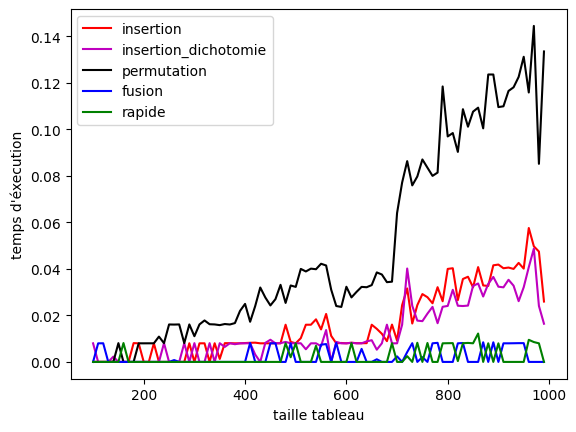

In [28]:
import matplotlib.pyplot as plt
x = []
insertion = []
insertiondicho = []
permutation = []
fusionres = []
rapide = []

for i in range(100,1000,10) :
    tab = [random.randint(0,20) for j in range(i)]
    x.append(i)
    insertion.append(duree(tab,1))
    insertiondicho.append(duree(tab,2))
    permutation.append(duree(tab,3))
    fusionres.append(duree(tab,4))
    rapide.append(duree(tab,5))
fig = plt.figure()
ax = plt.axes()

plt.plot(x,insertion,"r-",label="insertion")
plt.plot(x,insertiondicho,"m-",label="insertion_dichotomie")
plt.plot(x,permutation,"k-",label="permutation")
plt.plot(x,fusionres,"b-",label="fusion")
plt.plot(x,rapide,"g-",label="rapide")

plt.legend(loc="upper left")
plt.xlabel("taille tableau")
plt.ylabel("temps d'éxecution")
plt.show()

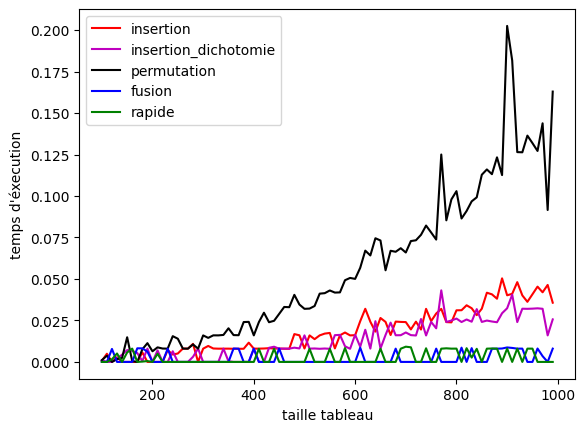

In [29]:
import matplotlib.pyplot as plt 
x = []
insertion = []
insertiondicho = []
permutation = []
fusionres = []
rapide = []

for i in range(100,1000,10) :
    tab = [random.randint(0,20) for j in range(i)]
    x.append(i)
    insertion.append(duree(tab,1))
    insertiondicho.append(duree(tab,2))
    permutation.append(duree(tab,3))
    fusionres.append(duree(tab,4))
    rapide.append(duree(tab,5))
fig = plt.figure()
ax = plt.axes()

plt.plot(x,insertion,"r-",label="insertion")
plt.plot(x,insertiondicho,"m-",label="insertion_dichotomie")
plt.plot(x,permutation,"k-",label="permutation")
plt.plot(x,fusionres,"b-",label="fusion")
plt.plot(x,rapide,"g-",label="rapide")

plt.legend(loc="upper left")
plt.xlabel("taille tableau")
plt.ylabel("temps d'éxecution")
plt.show()